# Tasca M9T01, Anàlisi de sentiment i textos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as stats

In [2]:
# configurar els gràfics
sns.set_style('whitegrid')
sns.set_palette('flare')

### Càrrega de l'arxiu

In [3]:
# Cargar el contenido del archivo
with open('C:/Users/Patricia/Desktop/Github/Data-Science-It-Academy/Sprint 9/wwz.txt', 'r', encoding='utf-8') as archivo:
    contenido = archivo.read()

El text seleccionat és el primer relat del llibre World War Z de Max Brooks publicat al 2006

    World War Z: An Oral History of the Zombie War de Max Brooks. És una novel·la de terror apocalíptica, està configurada com  una col·lecció de relats individuals narrats per un agent de la Comissió de Postguerra de les Nacions Unides, després del devastador conflicte mundial contra la plaga zombi. Altres passatges registren una lluita desesperada durant una dècada, tal com la van viure persones de diverses nacionalitats. Els comptes personals també descriuen els canvis socials, polítics, religiosos i ambientals resultants.
    
Com podem veure els relats son indendents

### Neteja

Abans de treure tots el signes de puntuació hauriem de separar en frases el text, llavors el que fem es fer talls on hi hagi punts.

In [4]:
contenido = contenido.split(' ')

i pasem tot a minuscules

In [5]:
contenido = [frase.lower() for frase in contenido]

### Normalitzar
La funció normalize_text realitza una sèrie de passos per normalitzar i netejar els textos. Aquests passos inclouen l'eliminació d'etiquetes HTML, l'eliminació d'URLs, l'eliminació de símbols de puntuació, l'eliminació de números, el reemplaçament de salts de línia per espais, la conversió a minúscules i l'eliminació d'accentuació i diacríts.

In [6]:
import re
from unidecode import unidecode

def normalize_text(text_list):
    # Passos d'eliminació de soroll i normalització de caràcters
    pasos = [
        (r'<[^<]+?>', ''),                      # Eliminació d'etiquetes HTML
        (r'http\S+', ''),                        # Eliminació d'URLs
        (r'[^\w\s]', ''),                        # Eliminació de símbols de puntuació
        (r'\d+', ''),                            # Eliminació de nombres
        (r'\n', ' '),                             # Reemplaçament de salts de línia per espais
        (None, lambda x: x.lower()),              # Conversió a minúscules
        (None, lambda x: unidecode(x))            # Eliminació d'accentuació i diacrítics
    ]

    # Aplicació dels passos a cada text
    normalized_list = []
    for text in text_list:
        for patro, substitucio in pasos:
            if patro:
                text = re.sub(patro, substitucio, text)
            elif substitucio:
                text = substitucio(text)
        normalized_list.append(text)
        
    return normalized_list

In [7]:
# Declarem el nou element normalized després de fer servir la funció
normalized = normalize_text(contenido)

## Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [8]:
from collections import Counter

# Verificar el tipus d'entrada
if isinstance(normalized, list):
    tokens = [word for word in normalized if isinstance(word, str)]
else:
    raise ValueError("L'entrada ha de ser una llista.")

# Imprimir el nombre total de paraules
print(f"Nombre total de paraules: {len(tokens)}")

# Imprimir els resultats ordenats
for paraula, conteig in sorted(Counter(tokens).items(), key=lambda x: x[1], reverse=True):
    print(f"Paraula '{paraula}': {conteig}")

Nombre total de paraules: 2912
Paraula 'the': 161
Paraula 'to': 86
Paraula 'and': 74
Paraula 'i': 67
Paraula 'was': 65
Paraula 'of': 58
Paraula 'a': 52
Paraula 'had': 48
Paraula 'his': 38
Paraula 'that': 32
Paraula 'it': 32
Paraula 'he': 32
Paraula 'were': 27
Paraula 'as': 23
Paraula 'been': 22
Paraula 'in': 22
Paraula 'me': 22
Paraula 'this': 21
Paraula 'for': 21
Paraula 'my': 21
Paraula 'they': 21
Paraula 'their': 20
Paraula 'on': 19
Paraula 'from': 19
Paraula 'all': 17
Paraula 'be': 16
Paraula 'one': 16
Paraula 'she': 15
Paraula 'at': 14
Paraula 'no': 14
Paraula 'we': 14
Paraula 'there': 13
Paraula 'with': 13
Paraula 'even': 13
Paraula 'an': 13
Paraula 'when': 12
Paraula 'not': 12
Paraula 'but': 11
Paraula 'could': 11
Paraula 'our': 11
Paraula 'have': 10
Paraula 'who': 10
Paraula 'than': 10
Paraula 'if': 10
Paraula 'asked': 10
Paraula 'her': 10
Paraula 'boy': 10
Paraula 'would': 10
Paraula 'now': 9
Paraula 'more': 9
Paraula 'is': 9
Paraula 'old': 9
Paraula 'said': 9
Paraula 'time': 

Paraula 'ulna': 1
Paraula 'bones': 1
Paraula 'stabbed': 1
Paraula 'cry': 1
Paraula 'seem': 1
Paraula 'assistants': 1
Paraula 'run': 1
Paraula 'room i': 1
Paraula 'instinctively': 1
Paraula 'retreated': 1
Paraula 'paces': 1
Paraula 'am': 1
Paraula 'embarrassed': 1
Paraula 'admit': 1
Paraula 'adult': 1
Paraula 'trained': 1
Paraula 'andyou': 1
Paraula 'raised': 1
Paraula 'peoples': 1
Paraula 'liberation': 1
Paraula 'treated': 1
Paraula 'share': 1
Paraula 'combat': 1
Paraula 'faced': 1
Paraula 'death': 1
Paraula 'occasion': 1
Paraula 'truly': 1
Paraula 'frail': 1
Paraula 'child the': 1
Paraula 'twist': 1
Paraula 'ripped': 1
Paraula 'completely': 1
Paraula 'muscle': 1
Paraula 'tore': 1
Paraula 'until': 1
Paraula 'nothing': 1
Paraula 'except': 1
Paraula 'stump': 1
Paraula 'tied': 1
Paraula 'severed': 1
Paraula 'hand': 1
Paraula 'dragged': 1
Paraula 'floor i': 1
Paraula 'hurried': 1
Paraula 'locking': 1
Paraula 'compose': 1
Paraula 'control': 1
Paraula 'shame': 1
Paraula 'cracked': 1
Paraula 

Tenim que el nostre text té 2941 paraules i que hi han molts stopwords. 

Les stopwords són paraules comunes que es consideren irrellevants per a l'anàlisi de text per la seva alta freqüència en un llenguatge natural. Aquestes paraules solen ser articles, pronoms, preposicions i altres paraules funcionals que s'utilitzen amb freqüència però que no aporten gaire significat a l'anàlisi de text.

Alguns exemples de stopwords en anglès inclouen "a", "an", "the", "in", "on", "is", "and", "but", "or", entre d'altres. Aquestes paraules són molt freqüents als textos però no aporten informació valuosa per a tasques com la classificació de text, anàlisi de sentiments o extracció de temes.

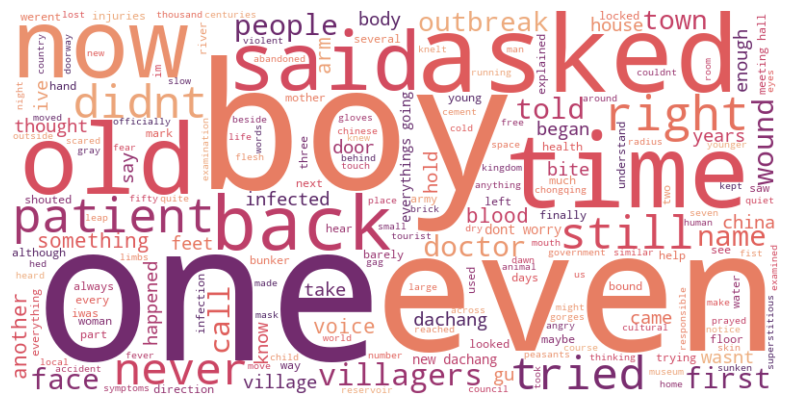

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear la Word Cloud 
wordcloud = WordCloud(width=800, height=400, colormap='flare', background_color='white').generate(' '.join(normalized))

# Mostrar la Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Fem una núvol de paraules sobre tota la llista, nna núvol de paraules, o també coneguda com a word cloud en anglès, és una representació visual de les paraules més freqüents en un text o conjunt de textos. En una núvol de paraules, les paraules més importants o més freqüents apareixen més grans i destacades, mentre que les paraules menys freqüents apareixen més petites. 

Tot i encara no haver retirar els stepword és força net.

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Tokenització, filtrat i lematització del text
tokens = []

for text in normalized:
    if isinstance(text, list):
        for sub_text in text:
            tokens += word_tokenize(sub_text)
    else:
        tokens += word_tokenize(text)

# Filtrat dels tokens eliminant les paraules de parada (stop words) i les paraules que no són del vocabulari anglès
filtered_tokens = [token for token in tokens if token not in stopwords.words('english') and token in set(nltk.corpus.words.words())]

# Lematització dels tokens
lemmatizer = WordNetLemmatizer()
stemmed_tokens = [PorterStemmer().stem(lemmatizer.lemmatize(token)) for token in filtered_tokens]

preprocessed_text = stemmed_tokens

In [11]:
len(preprocessed_text)

1105

    Podem veure que el text s'ha reduit i ara tenim 1150 paraules

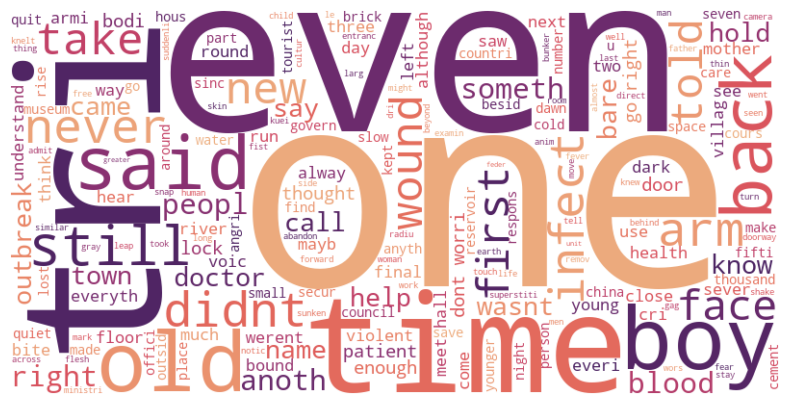

In [12]:
# Crear la Word Cloud
wordcloud = WordCloud(width=800, height=400, colormap='flare', background_color='white').generate(' '.join(preprocessed_text))

# Mostrar la Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

Fem servir SentimentIntensityAnalyzer que utilitza l'enfocament VADER, aquest implica l'ús d'un model específic per a l'anàlisi de sentiments desenvolupat per l'equip de recerca de NLTK. Aquest model està entrenat específicament per a l'anàlisi de text en anglès i utilitza un conjunt de paraules i puntuacions associades a sentiments positius, negatius i neutres per a determinar la polaritat del text.

Una altra aproximació podria ser AFINN però hauriem de definir keywords i puntuacions per cadascuna

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicialitzar l'anàlisi de sentiments amb l'analitzador de NLTK
analyzer = SentimentIntensityAnalyzer()

# Aplicar l'analitzador de sentiments a cada text de preprocessed_text
sentiments = [1 if analyzer.polarity_scores(text)['pos'] > 0 else 0 for text in preprocessed_text]

    Aquesta funció s'utilitza l'analitzador de sentiments per calcular les puntuacions de polaritat  del text mitjançant scores = analyzer.polarity_scores(text). El mètode polarity_scores torna un diccionari amb les puntuacions de polaritat del text, incloent-hi les puntuacions per a sentiment positiu (pos), sentiment negatiu (neg), sentiment neutral (neu) i la puntuació de la polaritat composta (compound). S'assigna el sentiment com a 1 si la puntuació de sentiment positiu és més gran que 0, en cas contrari s'assigna com a 0.

Amb aixó obtenim una llista amb la que podem:
    
1. Calcular la proporció de textos amb sentiment positiu i negatiu: Pots comptar la quantitat de textos amb sentiment positiu (valor 1) i negatiu (valor 0) a la llista sentiments per determinar la proporció de cada tipus de sentiment.

2. Calcular la puntuació mitjana de sentiment: Pots calcular la puntuació mitjana de sentiment sumant els valors de la llista sentiments i dividint-ho pel nombre total de textos.

3. Visualitzar l'anàlisi de sentiment: Podeu representar gràficament l'anàlisi de sentiment utilitzant gràfics de barres o gràfics de coca per mostrar la proporció de sentiments positius i negatius.

4. Realitzar una anàlisi comparativa: Si teniu més informació sobre els textos (per exemple, etiquetes de categories o etiquetes d'emocions associades), podeu comparar els sentiments amb aquestes característiques per obtenir informació addicional sobre les tendències de sentiment en diferents categories.

In [14]:
print('Sentiments positius:', sentiments.count(1) / len(sentiments))
print('Sentiments negatius:', sentiments.count(0) / len(sentiments))

Sentiments positius: 0.039819004524886875
Sentiments negatius: 0.9601809954751132


Tenim que el text és 96% sentiments negatius, partint de què sabem què és una novel·la de relats de terror no és sorprenent, crec que podria ser un exercici més per aplicar a una novel·la que sigui del tot narrativa i no tingui aquesta particularitat de ser-hi relats en primera persona que van canviant però amb un mateix "entrevistador"

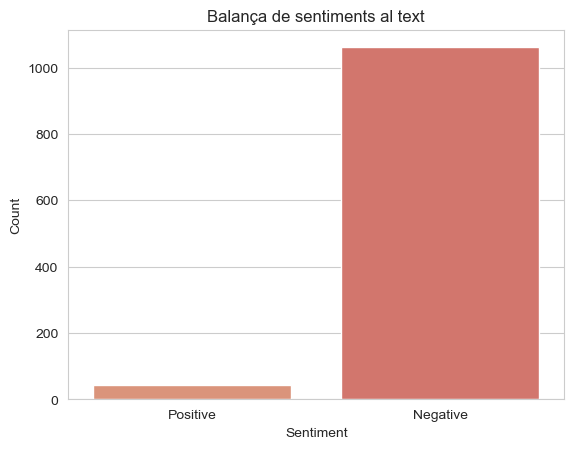

In [15]:
# Fem una representació gràfica
sns.barplot(x=['Positive', 'Negative'], y=[sentiments.count(1), sentiments.count(0)])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Balança de sentiments al text')
plt.show()